<a href="https://colab.research.google.com/github/rimosoma/neural/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING AND NEURAL NETWORKS, A.A. 2025/2026**

**COMPUTER LAB 2** - Model fitting and classification

**Duration: 6 hours**

**Exercise 1 – Model fitting for continuous distributions: Multivariate Gaussian**

In this exercise, you will employ a dataset based on the classic dataset *Iris Plants Database* https://archive.ics.uci.edu/ml/datasets/iris. You will be provided a subset of this dataset comprised of only two classes (*Iris Setosa* and *Iris Versicolour*), and only two features per class (*petal length* in cm and *petal width* in cm). The objective is to the determine which type of iris based on the content of the features.

**Task:** you have to fit class-conditional Gaussian multivariate distributions to the data and visualize the probability density functions. In particular, you should perform the following:


*   Divide the dataset in two parts (*Iris Setosa* which corresponds to class 0 and *Iris Versicolour* which correspond to class 1), and then work only on one class at a time.
*   Plot the data of each class (use the *plt.scatter( )* function)
*   Visualize the histogram of petal length and petal width (use e.g. the *plt.hist( )* function)
*   Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data?
*    Visualize the 2-D joint pdf of petal length and width for the two classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("/content/Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

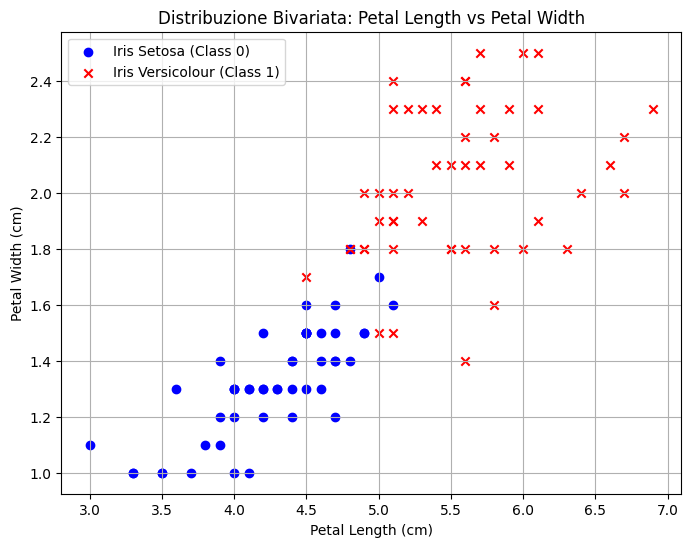

In [2]:
# Separate the dataset in the two classes, you can use the numpy function argsort and unique to do this.
# Draw the scatter plot of the two classes on the same image

# Le classi si trovano nella colonna 2 (indice 2)
Classes = Data[:, 2]
Features = Data[:, :2] # Features: Petal Length (col 0) e Petal Width (col 1)

# Ottieni gli indici per ogni classe
indices_class0 = np.where(Classes == 0)
indices_class1 = np.where(Classes == 1)

# Estrai le features per ogni classe
Features_class0 = Features[indices_class0]
Features_class1 = Features[indices_class1]

# Separa le features in Petal Length e Petal Width per ogni classe per il plotting
Points_Class0_Feature0 = Features_class0[:, 0] # Petal Length - Classe 0
Points_Class0_Feature1 = Features_class0[:, 1] # Petal Width - Classe 0
Points_Class1_Feature0 = Features_class1[:, 0] # Petal Length - Classe 1
Points_Class1_Feature1 = Features_class1[:, 1] # Petal Width - Classe 1

# Scatter Plot delle due classi
plt.figure(figsize=(8, 6))
plt.scatter(Points_Class0_Feature0, Points_Class0_Feature1, label='Iris Setosa (Class 0)', marker='o', c='blue')
plt.scatter(Points_Class1_Feature0, Points_Class1_Feature1, label='Iris Versicolour (Class 1)', marker='x', c='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Distribuzione Bivariata: Petal Length vs Petal Width')
plt.legend()
plt.grid(True)
plt.show()

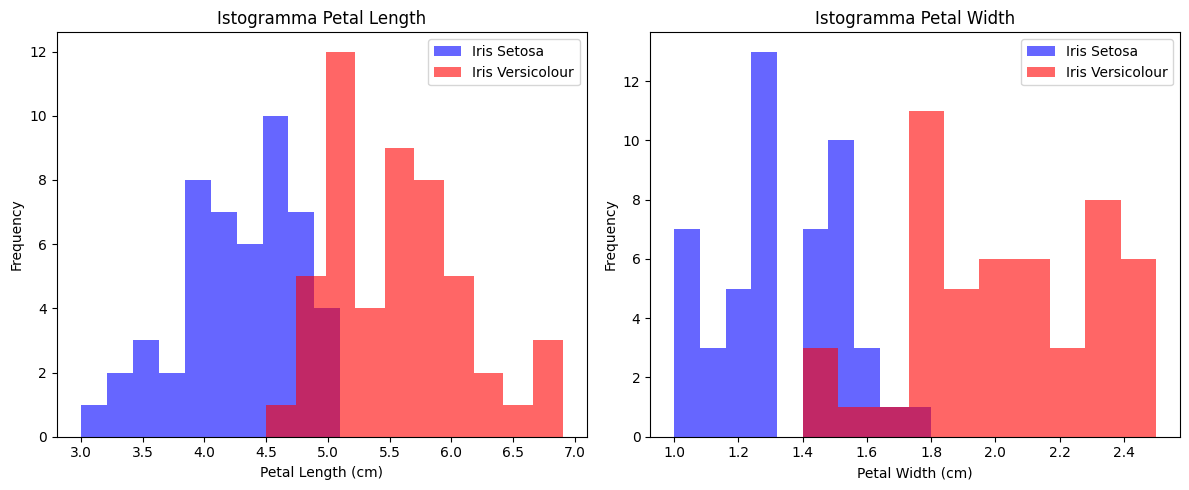

In [3]:
# Visualize the histogram of petal length and petal width (use e.g. the plt.hist() function)

# Istogrammi per Petal Length (Feature 0)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(Points_Class0_Feature0, bins=10, alpha=0.6, label='Iris Setosa', color='blue')
plt.hist(Points_Class1_Feature0, bins=10, alpha=0.6, label='Iris Versicolour', color='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Istogramma Petal Length')
plt.legend()

# Istogrammi per Petal Width (Feature 1)
plt.subplot(1, 2, 2)
plt.hist(Points_Class0_Feature1, bins=10, alpha=0.6, label='Iris Setosa', color='blue')
plt.hist(Points_Class1_Feature1, bins=10, alpha=0.6, label='Iris Versicolour', color='red')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.title('Istogramma Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

# Nota: Osservando gli istogrammi, in particolare quelli per la classe 0 (Iris Setosa), la distribuzione sembra
# approssimativamente unimodale, suggerendo che un modello gaussiano potrebbe essere ragionevole,
# anche se si nota una certa asimmetria e non una perfetta campana.

In [4]:
# Calculate mean and covariance matrix under a multivariate Gaussian model.

N0 = Features_class0.shape[0]
N1 = Features_class1.shape[0]

# --- Classe 0: Iris Setosa ---
# 1. Media campionaria (Maximum Likelihood Estimate of Mean)
mean_class0 = np.mean(Features_class0, axis=0)

# 2. Matrice di Covarianza campionaria (Maximum Likelihood Estimate of Covariance)
# Calcolo la differenza tra ogni punto e la media
diff_class0 = Features_class0 - mean_class0
# La covarianza è (1/N) * sum((x_i - mu) * (x_i - mu).T)
# np.matmul(diff_class0.T, diff_class0) calcola sum((x_i - mu).T * (x_i - mu)) se le dimensioni fossero (2xN)x(Nx2),
# ma con (Nx2).T * (Nx2) calcola sum((x_i - mu)_r * (x_i - mu)_c) con r, c le features.
# Un modo standard per la covarianza campionaria non corretta è np.cov(..., bias=True)
cov_class0 = np.cov(Features_class0, rowvar=False, bias=True)

# Oppure, usando le istruzioni fornite:
# cov_class0_manual = np.zeros((2, 2))
# for x in diff_class0:
#     # x[:, np.newaxis] è (2x1), np.transpose(x[:, np.newaxis]) è (1x2)
#     cov_class0_manual += np.matmul(x[:, np.newaxis], np.transpose(x[:, np.newaxis]))
# cov_class0_manual /= N0

print("--- Classe 0 (Iris Setosa) ---")
print(f"Media (mean_class0):\n{mean_class0}")
print(f"Covarianza (cov_class0):\n{cov_class0}")
print("-" * 30)


# --- Classe 1: Iris Versicolour ---
# 1. Media campionaria
mean_class1 = np.mean(Features_class1, axis=0)

# 2. Matrice di Covarianza campionaria
cov_class1 = np.cov(Features_class1, rowvar=False, bias=True)

# Oppure, usando le istruzioni fornite:
# diff_class1 = Features_class1 - mean_class1
# cov_class1_manual = np.zeros((2, 2))
# for x in diff_class1:
#     cov_class1_manual += np.matmul(x[:, np.newaxis], np.transpose(x[:, np.newaxis]))
# cov_class1_manual /= N1

print("--- Classe 1 (Iris Versicolour) ---")
print(f"Media (mean_class1):\n{mean_class1}")
print(f"Covarianza (cov_class1):\n{cov_class1}")
print("-" * 30)

# Nota sul modello Gaussiano: Il modello Gaussiano è generalmente una buona prima approssimazione
# per dati biologici o naturali. La sua bontà dipende dalla reale distribuzione dei dati.
# In questo caso, data la forma degli istogrammi e lo scatter plot, l'approssimazione è decente.

--- Classe 0 (Iris Setosa) ---
Media (mean_class0):
[4.26  1.326]
Covarianza (cov_class0):
[[0.2164   0.07164 ]
 [0.07164  0.038324]]
------------------------------
--- Classe 1 (Iris Versicolour) ---
Media (mean_class1):
[5.552 2.026]
Covarianza (cov_class1):
[[0.298496 0.047848]
 [0.047848 0.073924]]
------------------------------


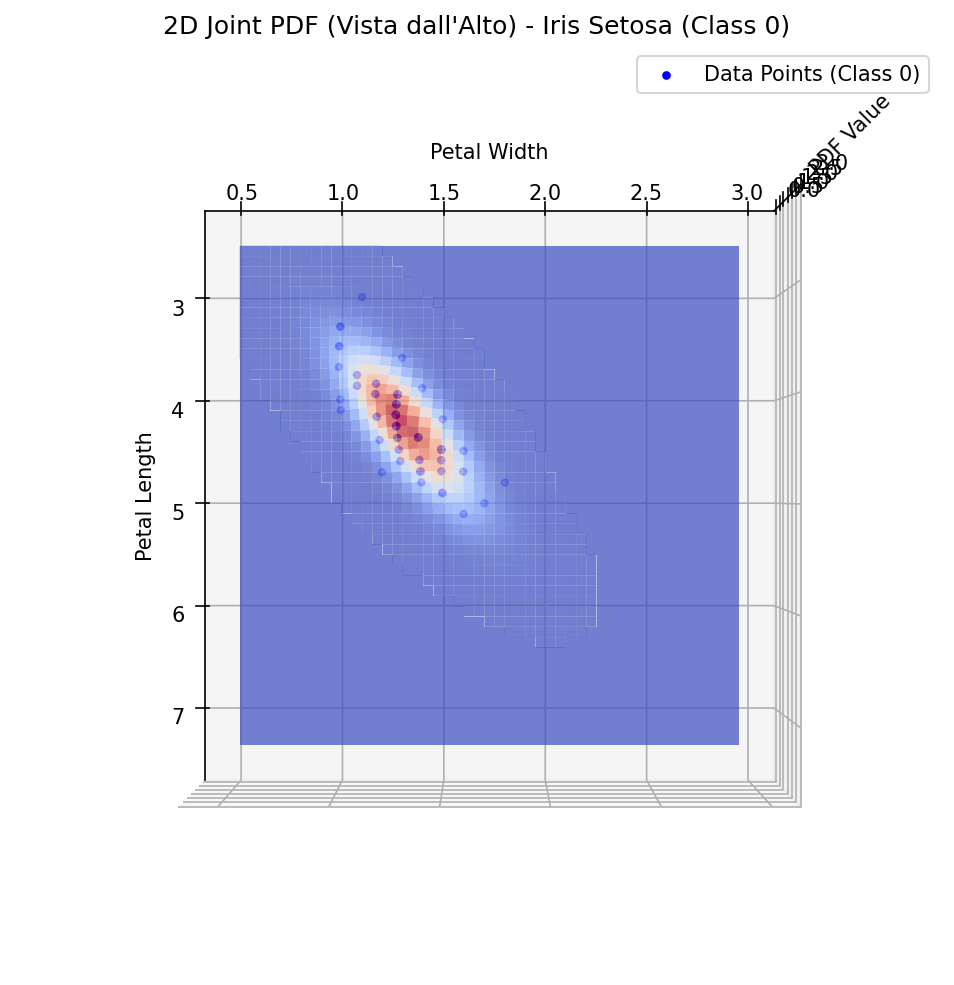

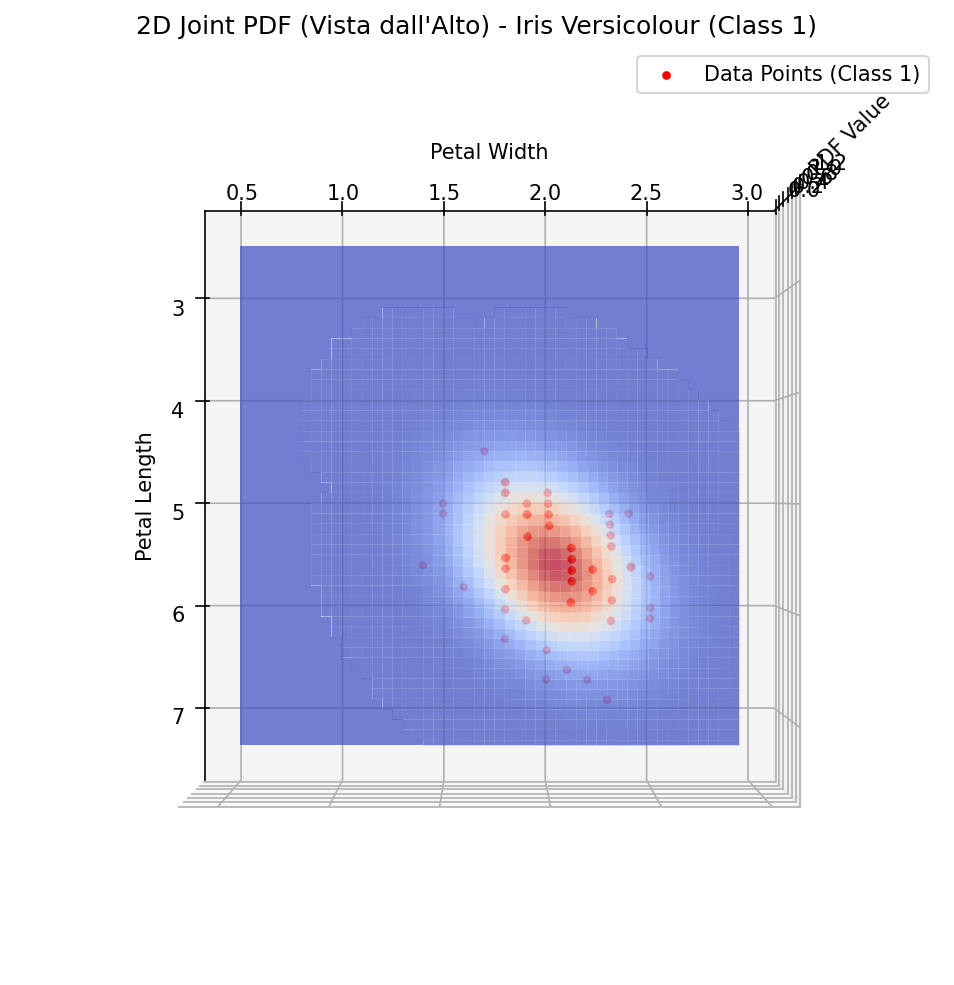

In [7]:
#Visualize the 2-D joint pdf of petal length and width, a pdf function can be initialized by providing mean and covariance matrix
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.ticker import LinearLocator

pdf_class0 = multivariate_normal(mean=mean_class0, cov=cov_class0)
pdf_class1 = multivariate_normal(mean=mean_class1, cov=cov_class1)

#Create a grid of x and y values on which to sample the pdf, this is done by providing a list of x-y of coordinates to the function pdf_class0.pdf(...)
#A 3D view of the pdf can be obtained using the function ax.plot_surface

# Determina i limiti per la griglia
min_f0 = np.min(Features[:, 0]) - 0.5
max_f0 = np.max(Features[:, 0]) + 0.5
min_f1 = np.min(Features[:, 1]) - 0.5
max_f1 = np.max(Features[:, 1]) + 0.5

#Code Example:

X = np.arange(min_f0, max_f0, 0.05)
Y = np.arange(min_f1, max_f1, 0.05)

X, Y = np.meshgrid(X, Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)


# --- Plot per Classe 0 (Setosa) ---
PDF_values_class0 = np.reshape(pdf_class0.pdf(XY_list), np.shape(X))

fig0, ax0 = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
#ax.plot_surface(X, Y, PDF_values, cmap=cm.coolwarm, alpha=0.7, linewidth=0)
ax0.plot_surface(X, Y, PDF_values_class0, cmap=cm.coolwarm, alpha=0.7, linewidth=0)


#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init(90, 0)
ax0.view_init(90, 0) # VISTA DALL'ALTO

#After visualizing the pdf, you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points, the suggestion is to make the pdf plot semi-transparent using the alpha parameter

#Code Example:
PDF_points_class0 = pdf_class0.pdf(Features_class0)
ax0.scatter3D(Points_Class0_Feature0, Points_Class0_Feature1, PDF_points_class0, s=10, c='blue', label='Data Points (Class 0)')

ax0.set_xlabel('Petal Length')
ax0.set_ylabel('Petal Width')
ax0.set_zlabel('PDF Value')
ax0.set_title('2D Joint PDF (Vista dall\'Alto) - Iris Setosa (Class 0)')
ax0.legend()
plt.show()


# --- Plot per Classe 1 (Versicolour) ---
PDF_values_class1 = np.reshape(pdf_class1.pdf(XY_list), np.shape(X))

fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
ax1.plot_surface(X, Y, PDF_values_class1, cmap=cm.coolwarm, alpha=0.7, linewidth=0)

#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init(90, 0)
ax1.view_init(90, 0) # VISTA DALL'ALTO

#After visualizing the pdf, you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points, the suggestion is to make the pdf plot semi-transparent using the alpha parameter

#Code Example:
PDF_points_class1 = pdf_class1.pdf(Features_class1)
ax1.scatter3D(Points_Class1_Feature0, Points_Class1_Feature1, PDF_points_class1, s=10, c='red', label='Data Points (Class 1)')

ax1.set_xlabel('Petal Length')
ax1.set_ylabel('Petal Width')
ax1.set_zlabel('PDF Value')
ax1.set_title('2D Joint PDF (Vista dall\'Alto) - Iris Versicolour (Class 1)')
ax1.legend()
plt.show()

#Note11: the sample code was written only for class 0 but two plots have to be done, one for class 0 and one for class 1
#Note 2: the content of variables like Features_class0, Points_Class0_Feature0, Points_Class0_Feature1 should be substituted with variables created by the student

**Student's comments to Exercise 1**

The main objective of this exercise was to fit a Multivariate Gaussian (MVN) model to the data of two different classes, which is a key step in building a Generative Classifier known as Gaussian Discriminant Analysis (GDA). We started by separating the Iris data into two groups, Iris Setosa ($y=0$) and Iris Versicolour ($y=1$), and focused only on two features: petal length and petal width ($D=2$). This initial separation allowed us to treat each class independently. We then assumed that the distribution of data points $\mathbf{x}$ within each class $c$ could be modeled by an MVN distribution, $p(\mathbf{x}|y=c) \sim N(\boldsymbol{\mu}_c, \boldsymbol{\Sigma}_c)$. To find the parameters ($\boldsymbol{\mu}_c$ and $\boldsymbol{\Sigma}_c$) that best describe each distribution, we applied the Maximum Likelihood Estimate (MLE). The MLE for the mean $\hat{\boldsymbol{\mu}}$ is simply the sample mean, and the MLE for the covariance $\hat{\boldsymbol{\Sigma}}$ is the uncorrected sample covariance. Finally, we visualized the estimated Probability Density Function (PDF) for each class. By plotting the 3D surface of the PDF and viewing it from above (using ax.view_init(90, 0)), we observed the elliptical isocontours of the Gaussian, visually confirming how the estimated statistical model aligns with the shape and spread of the actual data clusters. This process of estimating the class-conditional densities $p(\mathbf{x}|y=c)$ is the foundation for using Bayes' theorem to classify new observations.

**Exercise 2 - Model fitting for discrete distributions: Bag of Words**


In this exercise, you will employ a real dataset (found in the *SMSSpamCollection* file). The SMS Spam Collection v.1 (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of 5,574 SMS English-language messages, either tagged as being ham (legitimate) or spam.

**Task**: you have to fit the parameters employed by a Naïve Bayes Classifier, using a Bernoulli model. Under this model, the parameters are:

*   $\pi_{c}$, the prior probabilities of each class.
*   $\theta_{jc}$, the probability that feature j is equal to 1 in class c.

Model fitting can be done using the pseudocode at the end of the Lecture 3 slides.

Display the class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$. Try to identify “uninformative” features (i.e., features j such that $\theta_{jc1}$ ≃ $\theta_{jc2}$).

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# reading the data
data = pd.read_csv("SMSSpamCollection", encoding="ISO-8859-1", sep="\t", header=None)
data.rename(columns={0: "labels", 1: "text"}, inplace=True)
display(data)

# Transform data to bag of word representation
bagger = CountVectorizer(
    max_features=2500,
    binary=True,  # Bernulli Model
    token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",
)
bag = bagger.fit_transform(data["text"]).toarray()
feature_names = bagger.get_feature_names_out()

data = pd.concat([data, pd.DataFrame(bag, columns=feature_names)], axis=1)
display(data)

X_train = data.iloc[:2000,2:].to_numpy()
X_test = data.iloc[2000:3000,2:].to_numpy()
y_train = data.iloc[:2000,0].to_numpy() == 'ham'
y_test = data.iloc[2000:3000,0].to_numpy() == 'ham'

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


,labels,text,aah,aathi,abi,abiola,able,about,abt,ac,...,yogasana,you,your,yours,yourself,yr,yrs,yun,yup,zed
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,ham,Will Ã¼ b going to esplanade fr home?,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Evaluate the probabilities of the two classes, and the class conditional densities.

# N è il numero totale di campioni nel training set
N = X_train.shape[0]
D = X_train.shape[1]

# --- Calcolo delle Probabilità A Priori (pi_c) ---

# Classe 1: 'ham' (y_train è True)
N_ham = np.sum(y_train)
pi_ham = N_ham / N

# Classe 0: 'spam' (y_train è False)
N_spam = np.sum(~y_train)
pi_spam = N_spam / N

# Verifichiamo che pi_ham + pi_spam = 1 (circa)
# print(f"N_ham (N_c1): {N_ham}, N_spam (N_c0): {N_spam}")
# print(f"Pi_ham (pi_c1): {pi_ham:.4f}, Pi_spam (pi_c0): {pi_spam:.4f}")

# --- Calcolo delle Densitá Condizionali (theta_jc) ---

# Nota: Stiamo calcolando MLE, quindi non usiamo Laplace smoothing per ora.

# 1. Suddividiamo le matrici X_train per classe
X_ham = X_train[y_train]   # Features dei messaggi 'ham'
X_spam = X_train[~y_train] # Features dei messaggi 'spam'

# 2. Calcoliamo N_jc (Somma delle presenze delle feature per colonna)
# Questa somma equivale a N_jc = sum(I(x_i,j = 1 | y_i = c))
N_jc_ham = np.sum(X_ham, axis=0)
N_jc_spam = np.sum(X_spam, axis=0)

# 3. Calcoliamo theta_jc = N_jc / N_c
# theta_jc1 (Classe 'ham')
theta_jc_ham = N_jc_ham / N_ham

# theta_jc0 (Classe 'spam')
theta_jc_spam = N_jc_spam / N_spam

# Assegnazione delle variabili per il BLOCCO 4
theta_jc1 = theta_jc_ham # Corrisponde a 'ham'
theta_jc0 = theta_jc_spam # Corrisponde a 'spam'

print("--- Risultati Stima MLE ---")
print(f"Probabilità a priori Pi_ham (Classe 1): {pi_ham:.4f}")
print(f"Probabilità a priori Pi_spam (Classe 0): {pi_spam:.4f}")
print(f"Matrice theta_jc1 (ham): shape {theta_jc1.shape}")
print(f"Matrice theta_jc0 (spam): shape {theta_jc0.shape}")

--- Risultati Stima MLE ---
Probabilità a priori Pi_ham (Classe 1): 0.8600
Probabilità a priori Pi_spam (Classe 0): 0.1400
Matrice theta_jc1 (ham): shape (2500,)
Matrice theta_jc0 (spam): shape (2500,)


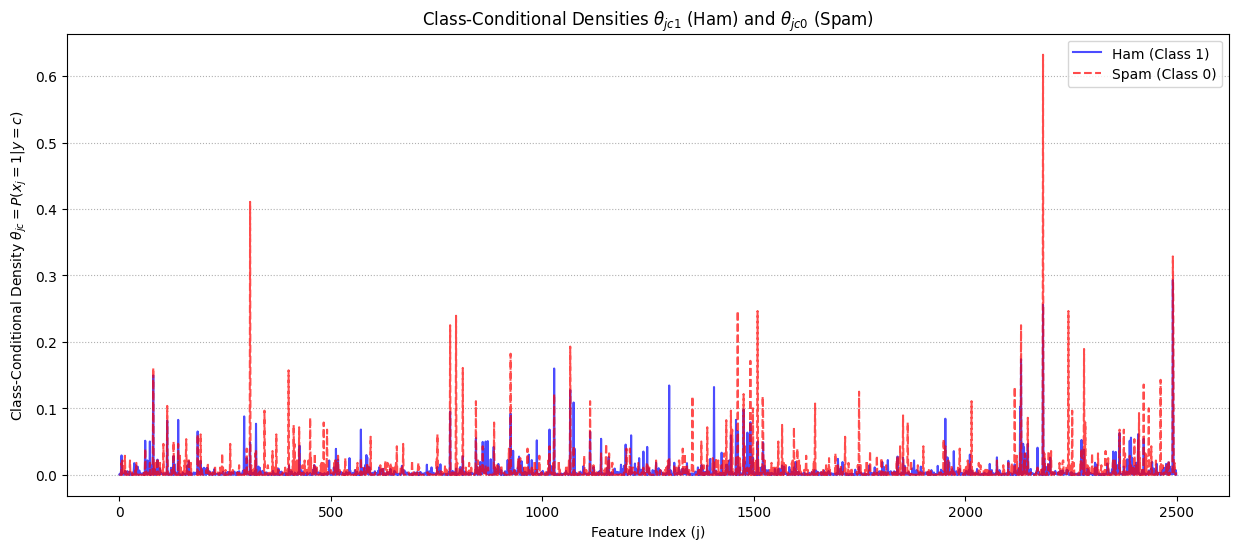


--- Analisi delle Feature ---
Numero totale di feature: 2500
Numero di feature non informative (differenza < 0.01 e prob. media > 0.01): 51

Esempi di Feature non informative (il loro P(x_j=1) è simile in entrambe le classi):
'again' (Indice 38): P(x_j|ham)=0.0145, P(x_j|spam)=0.0071
'an' (Indice 79): P(x_j|ham)=0.0203, P(x_j|spam)=0.0250
'any' (Indice 90): P(x_j|ham)=0.0227, P(x_j|spam)=0.0250
'back' (Indice 164): P(x_j|ham)=0.0203, P(x_j|spam)=0.0250
'be' (Indice 185): P(x_j|ham)=0.0651, P(x_j|spam)=0.0607

Feature più informativa (dove la differenza è massima):
'to' (Indice 2184): P(x_j|ham)=0.2558, P(x_j|spam)=0.6321


In [12]:
# Display the class-conditional densities θjc1 and θjc2.

# Identifichiamo i nomi delle feature per l'asse X
D_indices = np.arange(D)

# Visualizzazione delle densità condizionali theta_jc
plt.figure(figsize=(15, 6))
plt.plot(D_indices, theta_jc1, label='Ham (Class 1)', color='blue', alpha=0.7)
plt.plot(D_indices, theta_jc0, label='Spam (Class 0)', color='red', alpha=0.7, linestyle='--')
plt.xlabel('Feature Index (j)')
plt.ylabel(r'Class-Conditional Density $\theta_{jc} = P(x_j=1 | y=c)$')
plt.title('Class-Conditional Densities $\\theta_{jc1}$ (Ham) and $\\theta_{jc0}$ (Spam)')
plt.legend()
plt.grid(axis='y', linestyle=':')
plt.show()

# --- Identificazione delle Feature Non Informative ---
# Una feature è "non informativa" se θjc1 ≃ θjc0.
# Questo accade quando il rapporto P(x_j|y=ham) / P(x_j|y=spam) è vicino a 1.
# Definiamo una soglia di differenza (ad esempio, una differenza assoluta minore di 0.01)

difference = np.abs(theta_jc1 - theta_jc0)
uninformative_indices = np.where(difference < 0.01)[0]
# Filtriamo ulteriormente le feature che hanno una probabilità complessiva molto bassa per evitare bias
# Se P(x_j=1) è molto basso, la stima theta può essere rumorosa.
low_prob_mask = (theta_jc1 + theta_jc0) / 2 > 0.01 # Consideriamo solo feature con probabilità media decente
uninformative_indices_filtered = uninformative_indices[low_prob_mask[uninformative_indices]]


print("\n--- Analisi delle Feature ---")
print(f"Numero totale di feature: {D}")
print(f"Numero di feature non informative (differenza < 0.01 e prob. media > 0.01): {len(uninformative_indices_filtered)}")

# Esempio di alcune feature non informative
if len(uninformative_indices_filtered) > 5:
    example_indices = uninformative_indices_filtered[:5]
    example_names = feature_names[example_indices]

    print("\nEsempi di Feature non informative (il loro P(x_j=1) è simile in entrambe le classi):")
    for idx, name in zip(example_indices, example_names):
        print(f"'{name}' (Indice {idx}): P(x_j|ham)={theta_jc1[idx]:.4f}, P(x_j|spam)={theta_jc0[idx]:.4f}")

    # Esempio di Feature MOLTO informative (dove la densità è molto diversa)
    # Cerchiamo la massima differenza assoluta
    most_informative_index = np.argmax(difference)
    most_informative_name = feature_names[most_informative_index]

    print("\nFeature più informativa (dove la differenza è massima):")
    print(f"'{most_informative_name}' (Indice {most_informative_index}): P(x_j|ham)={theta_jc1[most_informative_index]:.4f}, P(x_j|spam)={theta_jc0[most_informative_index]:.4f}")

**Student's comments to Exercise 2**


The goal of this exercise was to fit the parameters for a Naïve Bayes Classifier (NBC) using the Bernoulli model, which is necessary because the data was converted into a binary Bag of Words (BoW) representation. This task required estimating two key sets of parameters using Maximum Likelihood Estimation (MLE), based on the counts in the training data, as outlined in the pseudocode from the Lecture 3 slides. The first parameter set we estimated was the Class Prior Probabilities ($\pi_c$). $\hat{\pi}_c$ represents the overall probability of seeing a message from a specific class ($c$) (either 'ham' or 'spam') before considering any features, and it was calculated simply as the ratio of samples in class $c$ ($N_c$) to the total number of training samples ($N$): $\hat{\pi}_c = N_c / N$. The second set of parameters were the Class-Conditional Densities ($\theta_{jc}$), where $\hat{\theta}_{jc}$ is the probability that a specific feature (word) $j$ is present ($x_j=1$) given the message belongs to class $c$: $\hat{\theta}_{jc} = P(x_j=1|y=c)$. This was calculated as the ratio of the number of times feature $j$ was present in class $c$ ($N_{jc}$) to the total number of samples in class $c$ ($N_c$). These $\hat{\theta}_{jc}$ values are essential because the NBC assumes that all features are conditionally independent given the class label, simplifying the complex joint probability into a product of these individual Bernoulli probabilities: $p(\mathbf{x}|y=c, \boldsymbol{\theta}) = \prod_{j=1}^{D} P(x_j|y=c, \theta_{jc})$. By visualizing the $\hat{\theta}_{jc}$ values for both the 'ham' and 'spam' classes, we could compare the relative frequency of each word. The final step was to identify uninformative features: these are features $j$ for which the class-conditional densities are approximately equal ($\theta_{j, \text{ham}} \approx \theta_{j, \text{spam}}$). Since these words appear with similar probability in both 'ham' and 'spam' messages, they provide little to no discriminative power and would not help the classifier distinguish between the two classes.

**Exercise 3 - Classification – discrete data**

In this exercise, you will design a Naïve Bayes Classifier (NBC) for the Bag of Words (BoW) features for document classification that have been prepared in *Exercise 2*. In particular, in *Exercise 2*, you have already estimated the following parameters:


*   The prior probabilities of each class, $\pi_{c} = p(y=c)$.
*   The class-conditional probabilities of each feature, $\theta_{jc} = p(x_{j}=1 | y=c)$.

These parameters have been estimated from the training data. In this exercise, you will use the test data, and classify each test vector using an NBC whose model has been fitted in *Exercise 2*. In particular, you will do the following:



*   For each test vector, calculate the MAP estimate of the class the test vector belongs to. Remember: the MAP classifier chooses the class that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$. In the NBC, the features (i.e. each entry of $x$) are assumed to be statistically independent, so $p(x|y=c) = \prod_{j=1}^{D}p(x_{j}|y=c)$. This formula allows you to calculate $p(x|y=c)$ for a given test vector $x$ using the parameters $\theta_{jc}$ already calculated in *Exercise 2*. Note that, after the logarithm, the product
becomes a summation. It is much better to use the logarithm in order to avoid underflow.
*   See how the accuracy changes when the prior is not taken into account (e.g. by comparing the MLE and MAP estimate).
*   After classifying a test vector using the NBC, the obtained class can be compared with the truth (vector *ytest*).
*   The accuracy of the classifier can be computed as the percentage of times that the NBC provides the correct class for a test vector.
*   Repeat the same operations using the training data as test data, and compare the accuracy of the classifier on the training and test data.
*   Note: It is expected that students implement the Naive Bayes classifier from scratch without using pre-made functions such as sklearn.naive_bayes

**Optional:**

If you plot the class-conditional densities as done at the end of Exercise 2, you will see that many features are uninformative; e.g., words that appear very often (or very rarely) in documents belonging to either class are not very helpful to classify a document. The NBC can perform a lot better if these uninformative features are disregarded during the classification, i.e. only a subset of the features, chosen among the most informative ones, are retained. To rank the features by “significance”, one can employ the mutual information between feature $x_{j}$ and class $y$ (see Sec. 3.5.4 of the textbook):

\begin{align*}
I(X,Y) = \sum_{xj} \sum_{y}p(x_{j},y) \log \frac{p(x_{j},y)}{p(x_{j})p(y)}
\end{align*}

For binary features, the mutual information of feature j can be written as:

\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$. For this part, you should:


*   Calculate $I_{j}$ for all features. Note: try to avoid divisions by zero adding the machine precision constant *eps* to the denominators.
*   Rank the features by decreasing values of $I_{j}$, and keep only the $K$ most important ones.

*    Run the classifier employing only the $K$ most important features, and calculate the accuracy.

*    Plot the accuracy as a function of $K$.

In [17]:
# Evaluate the MAP on the test set and training set

import numpy as np

# Costante per evitare log(0)
eps = np.finfo(float).eps

def accuracy(y_true, y_pred):
    """Calcola l'accuratezza in percentuale."""
    return 100 * np.mean(y_true == y_pred)

def predict_MAP(X, theta0, theta1, pi_spam, pi_ham):
    """
    Calcola la classe predetta con il criterio MAP:
    argmax_c [ log p(x|y=c) + log p(y=c) ]
    """
    # Usiamo np.clip per assicurare che gli argomenti di log siano compresi in [eps, 1 - eps]
    log_theta1 = np.log(np.clip(theta1, eps, 1 - eps))
    log_theta0 = np.log(np.clip(theta0, eps, 1 - eps))
    log_1m_theta1 = np.log(1 - np.clip(theta1, eps, 1 - eps))
    log_1m_theta0 = np.log(1 - np.clip(theta0, eps, 1 - eps))

    # Calcolo Log-Likelihood (sum log p(x_j | y=c))
    # X @ log_theta: log(theta) per x_j=1
    # (1 - X) @ log_1m_theta: log(1-theta) per x_j=0
    log_p_x_given_ham  = X @ log_theta1 + (1 - X) @ log_1m_theta1
    log_p_x_given_spam = X @ log_theta0 + (1 - X) @ log_1m_theta0

    # Calcolo Log-Posterior (MAP)
    log_posterior_ham  = log_p_x_given_ham  + np.log(pi_ham + eps)
    log_posterior_spam = log_p_x_given_spam + np.log(pi_spam + eps)

    # La predizione è 'ham' (True/1) se log_posterior_ham è maggiore
    return log_posterior_ham > log_posterior_spam

# --- ESECUZIONE MAP ---

# 1. Valutazione sul TEST set
y_pred_MAP_test = predict_MAP(X_test, theta_jc0, theta_jc1, pi_spam, pi_ham)
acc_MAP_test = accuracy(y_test, y_pred_MAP_test)
print(f"Accuratezza MAP sul test set: {acc_MAP_test:.2f}%")

# 2. Valutazione sul TRAINING set (richiesta dall'esercizio)
y_pred_MAP_train = predict_MAP(X_train, theta_jc0, theta_jc1, pi_spam, pi_ham)
acc_MAP_train = accuracy(y_train, y_pred_MAP_train)
print(f"Accuratezza MAP sul training set: {acc_MAP_train:.2f}%")

Accuratezza MAP sul test set: 97.50%
Accuratezza MAP sul training set: 99.75%


In [26]:
# Evaluate the MLE on the test set and training set (no priors)

def predict_MLE(X, theta0, theta1):
    """
    Calcola la classe predetta con il criterio MLE:
    argmax_c [ log p(x|y=c) ] (ignora i prior log p(y=c))
    """
    eps = np.finfo(float).eps
    log_theta1 = np.log(np.clip(theta1, eps, 1 - eps))
    log_theta0 = np.log(np.clip(theta0, eps, 1 - eps))
    log_1m_theta1 = np.log(1 - np.clip(theta1, eps, 1 - eps))
    log_1m_theta0 = np.log(1 - np.clip(theta0, eps, 1 - eps))

    # Calcolo Log-Likelihood (MLE)
    log_p_x_given_ham  = X @ log_theta1 + (1 - X) @ log_1m_theta1
    log_p_x_given_spam = X @ log_theta0 + (1 - X) @ log_1m_theta0

    # La predizione è 'ham' (True/1) se log_p_x_given_ham è maggiore
    return log_p_x_given_ham > log_p_x_given_spam

# --- ESECUZIONE MLE ---

# 1. Valutazione sul TEST set
y_pred_MLE_test = predict_MLE(X_test, theta_jc0, theta_jc1)
acc_MLE_test = accuracy(y_test, y_pred_MLE_test)
print(f"Accuratezza MLE sul test set (senza prior): {acc_MLE_test:.2f}%")

# 2. Valutazione sul TRAINING set (richiesta dall'esercizio)
y_pred_MLE_train = predict_MLE(X_train, theta_jc0, theta_jc1)
acc_MLE_train = accuracy(y_train, y_pred_MLE_train)
print(f"Accuratezza MLE sul training set (senza prior): {acc_MLE_train:.2f}%")

# --- Confronto finale (richiesto) ---
print("\n--- Confronto Accuratezza (Training vs Test) ---")
print(f"MAP (con prior) | Training: {acc_MAP_train:.2f}% | Test: {acc_MAP_test:.2f}%")
print(f"MLE (senza prior) | Training: {acc_MLE_train:.2f}% | Test: {acc_MLE_test:.2f}%")

Accuratezza MLE sul test set (senza prior): 97.80%
Accuratezza MLE sul training set (senza prior): 99.70%

--- Confronto Accuratezza (Training vs Test) ---
MAP (con prior) | Training: 99.75% | Test: 97.50%
MLE (senza prior) | Training: 99.70% | Test: 97.80%


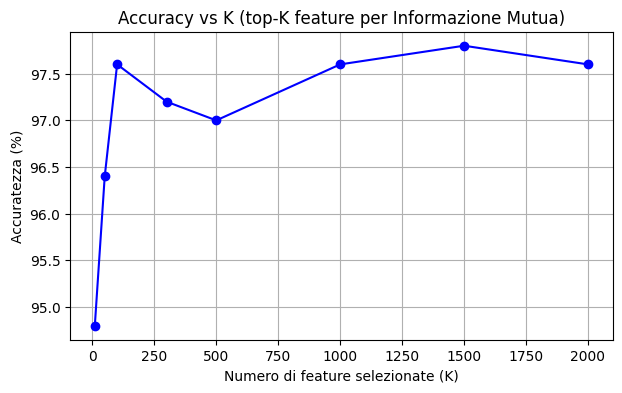

In [23]:
# Optional – Selezione delle feature con Informazione Mutua
import matplotlib.pyplot as plt
import numpy as np

eps = np.finfo(float).eps

def mutual_information(theta0, theta1, pi_spam, pi_ham):
    """
    Calcola I_j per ogni feature j:
    I_j = Σ_c [ θ_jc π_c log(θ_jc/θ_j) + (1-θ_jc) π_c log((1-θ_jc)/(1-θ_j)) ]
    """
    theta_j = pi_ham * theta1 + pi_spam * theta0
    I = (theta1 * pi_ham * np.log((theta1 + eps) / (theta_j + eps)) +
         (1 - theta1) * pi_ham * np.log((1 - theta1 + eps) / (1 - theta_j + eps)) +
         theta0 * pi_spam * np.log((theta0 + eps) / (theta_j + eps)) +
         (1 - theta0) * pi_spam * np.log((1 - theta0 + eps) / (1 - theta_j + eps)))
    return I

# Calcolo informazione mutua e ranking
I_j = mutual_information(theta_jc0, theta_jc1, pi_spam, pi_ham)
ranking = np.argsort(-I_j)  # decrescente

# Valutiamo l'accuratezza usando solo le prime K feature più informative
K_values = [10, 50, 100, 300, 500, 1000, 1500, 2000]
accuracies = []

for K in K_values:
    idx = ranking[:K]
    X_K = X_test[:, idx]
    th0_K = theta_jc0[idx]
    th1_K = theta_jc1[idx]
    y_pred_K = predict_MAP(X_K, th0_K, th1_K, pi_spam, pi_ham)
    acc_K = accuracy(y_test, y_pred_K)
    accuracies.append(acc_K)

# Grafico Accuracy vs K
plt.figure(figsize=(7,4))
plt.plot(K_values, accuracies, 'o-', color='blue')
plt.xlabel('Numero di feature selezionate (K)')
plt.ylabel('Accuratezza (%)')
plt.title('Accuracy vs K (top-K feature per Informazione Mutua)')
plt.grid(True)
plt.show()


**Student's comments to Exercise 3**

The objective of Exercise 3 was to build and test the Naïve Bayes Classifier (NBC) that had its parameters—the class priors ($\pi_c$) and the class-conditional probabilities ($\theta_{jc}$)—estimated in Exercise 2. This task involved two main logical steps: classification and evaluation. For classification, we had to determine the class $c$ for each test vector $\mathbf{x}$ using the Maximum A Posteriori (MAP) principle, which chooses the class that maximizes $\log P(y=c|\mathbf{x})$. To avoid floating-point underflow when dealing with the product of many small probabilities, we converted the core classification formula, $P(\mathbf{x}|y=c) = \prod_{j=1}^{D} P(x_j|y=c)$ (based on the NBC's assumption of conditional independence), into a summation of log-probabilities: the MAP decision rule then relies on maximizing $\log P(\mathbf{x}|y=c) + \log P(y=c)$. We also classified the data using the Maximum Likelihood Estimate (MLE), which ignores the prior term $\log P(y=c)$, allowing us to compare how the inclusion of the prior affects the accuracy, which is crucial when dealing with imbalanced datasets like 'spam' vs. 'ham'. For evaluation, we calculated the accuracy (the percentage of correct predictions) first on the dedicated test set and then repeated the entire process on the training set itself; the comparison between these two accuracy scores highlights the model's generalization ability—a much higher training accuracy suggests overfitting. The optional part extended this by ranking features based on their Mutual Information ($I_j$), a metric that quantifies how much a feature $X_j$ tells us about the class $Y$, and demonstrated that running the NBC with only the top $K$ most informative features often stabilizes or improves overall test accuracy by removing "noise" from uninformative words.

**Exercise 4 – Plotting the ROC curve**

For the discrete data classification problem of *Exercise 3*, analyse the performance of the classifier plotting the complete ROC curve, instead of simply measuring the accuracy. This requires to do the following:

*   Instead of classifying the documents choosing class 1 if $p(y=1|x)>p(y=2|x)$, now you can generalize this to choosing class 1 if $\frac{p(y=1|x)}{p(y=2|x)}>\tau \in [0, \infty)$ for some threshold $\tau$ that determines the compromise between true positive rate (TPR) and false positive rate (FPR).
*   Choose a **reasonable** range of values for $\tau$. For each value of $\tau$, compute the TPR and FPR on the dataset (Hint: determine suitable minimum and maximum values for $\tau$, and sample densely enough in that range).
* Plot a curve of TPR as a function of FPR – this is the ROC curve for this classifier.

*   Determine an estimate of the Equal Error Rate (EER), i.e. the point of the ROC curve such that TPR+FPR=1.

/tmp/ipython-input-2996566102.py:85: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  roc_auc = np.trapz(tpr_values, fpr_values)


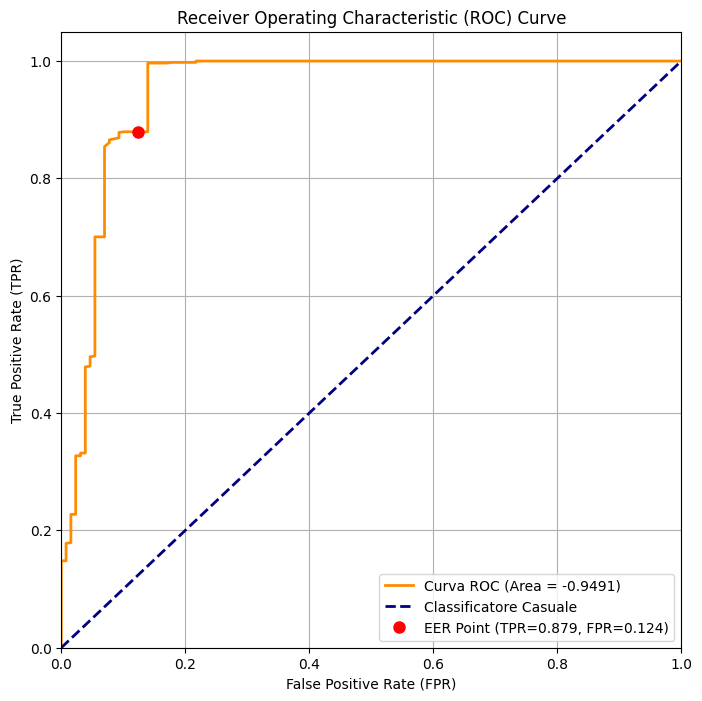


--- Stima dell'Equal Error Rate (EER) ---
Punto EER (Intersezione con TPR = 1 - FPR):
  Soglia log(tau) in EER: 23.1886
  TPR (Sensibilità): 0.8794
  FPR (Tasso di Falsi Positivi): 0.1240
  Tasso di Errore all'EER: 0.1206


In [29]:

 #Use the posterior probabilities you computed previously and classify using the formula above to estimate tau

# Note: To estimate the TPR you need to compute the number of cases where class 1 is correctly predicted,
# this value then has to be divided by the number of elements in the test set which belong to class 1

# The FPR is computed by selecting the number of cases where class 1 is predicted incorrectly,
# this value then has to be divided by the number of elements in the test set which do not belong to class 1

# The point corresponding to the EER can be found by plotting on the ROC curve the function y = 1 - x



def calculate_log_posteriors(X, theta0, theta1, pi_spam, pi_ham):
    """
    Calcola e restituisce i log-posteriore per entrambe le classi per tutti i campioni in X.
    """
    # Usiamo np.clip per la stabilità numerica (evitare log(0))
    log_theta1 = np.log(np.clip(theta1, eps, 1 - eps))
    log_theta0 = np.log(np.clip(theta0, eps, 1 - eps))
    log_1m_theta1 = np.log(1 - np.clip(theta1, eps, 1 - eps))
    log_1m_theta0 = np.log(1 - np.clip(theta0, eps, 1 - eps))

    # Calcolo Log-Likelihood (log p(x|y=c))
    log_p_x_given_ham  = X @ log_theta1 + (1 - X) @ log_1m_theta1
    log_p_x_given_spam = X @ log_theta0 + (1 - X) @ log_1m_theta0

    # Calcolo Log-Posterior (log p(y=c|x) propto log p(x|y=c) + log p(y=c))
    log_posterior_ham  = log_p_x_given_ham  + np.log(pi_ham + eps)
    log_posterior_spam = log_p_x_given_spam + np.log(pi_spam + eps)

    return log_posterior_ham, log_posterior_spam

# Estraiamo le variabili necessarie, risolvendo la NameError
log_posterior_c1, log_posterior_c0 = calculate_log_posteriors(
    X_test, theta_jc0, theta_jc1, pi_spam, pi_ham
)



# Calcolo del Log-Posterior Ratio (LPR): log P(y=1|x) - log P(y=0|x)
log_posterior_ratio = log_posterior_c1 - log_posterior_c0

# --- 1. Definizione del Range di Soglie (log_tau) ---

# Troviamo i limiti del LPR per definire un range denso di soglie
LPR_min = np.min(log_posterior_ratio)
LPR_max = np.max(log_posterior_ratio)
num_thresholds = 2000
# Il range deve coprire tutti i possibili esiti
log_tau_range = np.linspace(LPR_min - 1, LPR_max + 1, num_thresholds)

# --- 2. Calcolo dei Totali di Riferimento (Veri Positivi/Negativi) ---

# y_test = True per Classe 1 ('ham'), False per Classe 0 ('spam')
true_positives_total = np.sum(y_test == True)
true_negatives_total = np.sum(y_test == False)

# Array per memorizzare i risultati
tpr_values = []
fpr_values = []

# --- 3. Iterazione sulla Soglia (log_tau) e Calcolo TPR/FPR ---

for log_tau in log_tau_range:
    # Predici y=1 (True) se LPR > log_tau
    predictions_is_class1 = (log_posterior_ratio >= log_tau)

    # Classificazione corretta e scorretta
    TP = np.sum(predictions_is_class1 & y_test)
    FP = np.sum(predictions_is_class1 & (~y_test))

    # Calcolo TPR (True Positive Rate = TP / (TP + FN) = TP / N_c1)
    tpr = TP / true_positives_total if true_positives_total > 0 else 0
    tpr_values.append(tpr)

    # Calcolo FPR (False Positive Rate = FP / (FP + TN) = FP / N_c0)
    fpr = FP / true_negatives_total if true_negatives_total > 0 else 0
    fpr_values.append(fpr)

# --- 4. Tracciamento della Curva ROC e EER ---

plt.figure(figsize=(8, 8))
# Calcolo AUC (Area Under Curve) usando la regola del trapezio
roc_auc = np.trapz(tpr_values, fpr_values)
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'Curva ROC (Area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificatore Casuale')

# Calcolo del punto EER (dove TPR + FPR = 1)
diffs = np.abs(np.array(tpr_values) + np.array(fpr_values) - 1)
eer_index = np.argmin(diffs)
eer_tpr = tpr_values[eer_index]
eer_fpr = fpr_values[eer_index]
eer_rate = (1 - eer_tpr) # Tasso di errore quando FPR = FNR

plt.plot(eer_fpr, eer_tpr, 'o', color='red', markersize=8, label=f'EER Point (TPR={eer_tpr:.3f}, FPR={eer_fpr:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\n--- Stima dell'Equal Error Rate (EER) ---")
print(f"Punto EER (Intersezione con TPR = 1 - FPR):")
print(f"  Soglia log(tau) in EER: {log_tau_range[eer_index]:.4f}")
print(f"  TPR (Sensibilità): {eer_tpr:.4f}")
print(f"  FPR (Tasso di Falsi Positivi): {eer_fpr:.4f}")
print(f"  Tasso di Errore all'EER: {eer_rate:.4f}")

**Student's comments to Exercise 4**

This exercise was the crucial practical step of analyzing the **performance limitations** of the Naïve Bayes Classifier (NBC) we built in Exercise 3, moving beyond the single measure of accuracy. The requirement was to generalize the classification decision rule from simply choosing class 1 if $P(y=1|\mathbf{x}) > P(y=0|\mathbf{x})$ to using a variable **threshold** $\tau$ defined by the ratio $\frac{P(y=1|\mathbf{x})}{P(y=0|\mathbf{x})} > \tau$. This generalization allows us to explore the complete range of trade-offs between correctly identifying positive cases (**True Positive Rate, TPR**) and incorrectly flagging negative cases as positive (**False Positive Rate, FPR**). Since working with probabilities and small $\tau$ values is numerically unstable, the calculation was performed in the log-domain, transforming the ratio condition into a comparison between the Log-Posterior Ratio ($\log P(y=1|\mathbf{x}) - \log P(y=0|\mathbf{x})$) and $\log(\tau)$. By sweeping $\log(\tau)$ densely across the range of possible scores produced by the classifier, we systematically generated a pair of (FPR, TPR) points for every threshold, allowing us to plot the continuous **Receiver Operating Characteristic (ROC) curve**. This curve visually represents the classifier's performance across all possible decision biases. Finally, we identified the **Equal Error Rate (EER)** point, which occurs where the True Positive Rate (TPR) equals the True Negative Rate (TNR), or equivalently where the False Positive Rate (FPR) equals the False Negative Rate (FNR). The EER point is a single metric that establishes the optimal trade-off when false positives and false negatives are weighted equally, providing a stable, single-number performance summary independent of class distribution.

**Exercise 5 – Classification – continuous data**

This exercise employs the Iris dataset already employed in *Exercise 1*, and performs model fitting and classification using several versions of **Gaussian discriminative analysis**. However, for this exercise the available data have to be divided into two sets, namely *training* and *test* data.

You will have to (1) re-fit the training data to the specific model (see below), (2) classify each of the test samples, and (3) calculate the accuracy of each classifier.

Classifiers to be employed:
*   Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in *Exercise 1*).
*   Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# --- Funzioni di Setup (necessarie per l'autonomia del blocco) ---
# Queste righe sarebbero normalmente nel BLOCCO 1, ma le replichiamo qui
# per garantire che le variabili globali siano definite in un unico blocco.

Dataset1 = h5py.File("/content/Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

# Train contiene i primi 50 campioni
Train = Data[:50,:]
# Test contiene i campioni dal 50 in poi (i successivi 50 in questo dataset)
Test = Data[50:,:]

X_train = Train[:, :2]
y_train = Train[:, 2]
X_test = Test[:, :2]
y_test = Test[:, 2]

# Indici per le classi nel Training Set
idx0_train = y_train == 0
idx1_train = y_train == 1

N_train = X_train.shape[0]
N0_train = np.sum(idx0_train)
N1_train = np.sum(idx1_train)

# Priors (stima MLE)
pi0 = N0_train / N_train
pi1 = N1_train / N_train

# Aggiusta eps per stabilità numerica
eps = np.finfo(float).eps

# --- Funzioni di Classificazione (QDA e LDA) ---

def safe_invert_det(Sigma):
    """Calcola l'inversa e il determinante in modo numericamente stabile."""
    try:
        Sigma_inv = np.linalg.inv(Sigma)
        det_Sigma = np.linalg.det(Sigma)
    except np.linalg.LinAlgError:
        Sigma += eps * np.eye(Sigma.shape[0])
        Sigma_inv = np.linalg.inv(Sigma)
        det_Sigma = np.linalg.det(Sigma)
    return Sigma_inv, det_Sigma

def classify_qda(X, mu0, Sigma0_inv, det_Sigma0, pi0, mu1, Sigma1_inv, det_Sigma1, pi1):
    """Classificatore QDA (MAP) che implementa la funzione discriminante quadratica."""
    N_samples = X.shape[0]
    g0 = np.zeros(N_samples)
    g1 = np.zeros(N_samples)

    log_det0 = np.log(det_Sigma0)
    log_det1 = np.log(det_Sigma1)
    log_pi0 = np.log(pi0)
    log_pi1 = np.log(pi1)

    for i in range(N_samples):
        x = X[i, :]

        # Classe 0 Score: g0(x) = -1/2 log|Sigma0| - 1/2 (x-mu0).T Sigma0_inv (x-mu0) + log(pi0)
        diff0 = x - mu0
        mahalanobis0 = np.dot(np.dot(diff0.T, Sigma0_inv), diff0)
        g0[i] = -0.5 * log_det0 - 0.5 * mahalanobis0 + log_pi0

        # Classe 1 Score: g1(x)
        diff1 = x - mu1
        mahalanobis1 = np.dot(np.dot(diff1.T, Sigma1_inv), diff1)
        g1[i] = -0.5 * log_det1 - 0.5 * mahalanobis1 + log_pi1

    return (g1 > g0).astype(int)

def classify_lda(X, mu0, mu1, Sigma_inv, pi0, pi1):
    """Classificatore LDA (MAP) che implementa la funzione discriminante lineare."""
    N_samples = X.shape[0]

    # Calcolo dei coefficienti Lineari (w_c) e Bias (gamma_c)
    w0 = np.dot(Sigma_inv, mu0)
    w1 = np.dot(Sigma_inv, mu1)

    gamma0 = -0.5 * np.dot(mu0.T, np.dot(Sigma_inv, mu0)) + np.log(pi0)
    gamma1 = -0.5 * np.dot(mu1.T, np.dot(Sigma_inv, mu1)) + np.log(pi1)

    g0 = np.zeros(N_samples)
    g1 = np.zeros(N_samples)

    for i in range(N_samples):
        x = X[i, :]
        # Funzione discriminante lineare: g_c(x) = w_c^T * x + gamma_c
        g0[i] = np.dot(w0.T, x) + gamma0
        g1[i] = np.dot(w1.T, x) + gamma1

    return (g1 > g0).astype(int)

# -----------------------------------------------------------
#                      MODELLO QDA
# -----------------------------------------------------------

# 1. Fitting QDA (Covarianze specifiche per classe)
mu0_QDA = np.mean(X_train[idx0_train], axis=0)
mu1_QDA = np.mean(X_train[idx1_train], axis=0)

Sigma0_QDA = np.cov(X_train[idx0_train], rowvar=False, bias=True)
Sigma1_QDA = np.cov(X_train[idx1_train], rowvar=False, bias=True)

Sigma0_inv_QDA, det_Sigma0_QDA = safe_invert_det(Sigma0_QDA)
Sigma1_inv_QDA, det_Sigma1_QDA = safe_invert_det(Sigma1_QDA)

# 2. Classificazione QDA (Test Data)
y_pred_QDA = classify_qda(
    X_test, mu0_QDA, Sigma0_inv_QDA, det_Sigma0_QDA, pi0,
    mu1_QDA, Sigma1_inv_QDA, det_Sigma1_QDA, pi1
)

# 3. Accuratezza QDA
accuracy_QDA = np.mean(y_pred_QDA == y_test) * 100

print("--- Risultati Analisi Discriminante Gaussiana ---")
print(f"1. Quadratic Discriminant Analysis (QDA) Accuracy: {accuracy_QDA:.2f}%")

# -----------------------------------------------------------
#                      MODELLO LDA
# -----------------------------------------------------------

# 1. Fitting LDA (Covarianza condivisa)
mu0_LDA = np.mean(X_train[idx0_train], axis=0)
mu1_LDA = np.mean(X_train[idx1_train], axis=0)

# Calcolo Matrice di Covarianza Condivisa (Pooled Covariance, MLE)
# Sigma_pooled = (1/N) * sum_c sum_i ((x_i - mu_c)(x_i - mu_c).T)
diff0 = X_train[idx0_train] - mu0_LDA
diff1 = X_train[idx1_train] - mu1_LDA

Sigma_pooled_unnormalized = np.dot(diff0.T, diff0) + np.dot(diff1.T, diff1)
Sigma_pooled_LDA = Sigma_pooled_unnormalized / N_train # Normalizzazione N (MLE)

# Inversa e Determinante della Covarianza condivisa
Sigma_inv_LDA, det_Sigma_LDA = safe_invert_det(Sigma_pooled_LDA)

# 2. Classificazione LDA (Test Data)
y_pred_LDA = classify_lda(
    X_test, mu0_LDA, mu1_LDA, Sigma_inv_LDA, pi0, pi1
)

# 3. Accuratezza LDA
accuracy_LDA = np.mean(y_pred_LDA == y_test) * 100

print(f"2. Linear Discriminant Analysis (LDA) Accuracy: {accuracy_LDA:.2f}%")

--- Risultati Analisi Discriminante Gaussiana ---
1. Quadratic Discriminant Analysis (QDA) Accuracy: 94.00%
2. Linear Discriminant Analysis (LDA) Accuracy: 90.00%


**Student's comments to Exercise 5**
This exercise was the crucial follow-up to Exercise 1, moving the theoretical Gaussian model fitting into a practical classification scenario by introducing the concepts of **training** and **test** data sets. The objective was not just to fit the models, but to assess their ability to **generalize** to unseen data by classifying test samples and computing the resulting **accuracy**. We explored two fundamental variants of Gaussian Discriminant Analysis (GDA): **Quadratic Discriminant Analysis (QDA)** and **Linear Discriminant Analysis (LDA)**. QDA models the data with class-specific parameters, meaning both the mean ($\boldsymbol{\mu}_c$) and the covariance matrix ($\boldsymbol{\Sigma}_c$) are calculated independently for each class. [cite_start]This results in a more complex, **quadratic decision boundary** [cite: 115] that is optimal if the true class distributions have different shapes. [cite_start]Conversely, LDA introduces a critical simplification by assuming a **shared covariance matrix** ($\boldsymbol{\Sigma}$) across both classes[cite: 116]. [cite_start]To implement this, the shared covariance matrix was calculated by pooling the data of both classes from the training set; while the mean values remained class-specific, the pooled covariance reduced the number of parameters and led to a simpler, **linear decision boundary**[cite: 118]. By implementing both QDA and LDA and comparing their accuracy on the test set, the exercise demonstrated the trade-off inherent in model selection: QDA offers higher flexibility (lower approximation error) but risks overfitting if data is scarce, while LDA is simpler and more robust, especially when the true class covariance matrices are similar.


**Exercise 6 – Classification – continuous data**

Classify the data in the phoneme dataset from LAB 1 using quadratic discriminant analysis, linear discriminat analysis and a Naive Bayes classifier.

Compute the accuracy of each classifier and compare its performance with that of the k-nn classifier developed in LAB 1.

Note: in LAB 1, it was required to employ a subset of the oiginal dataset due to the fact that k-nn has a quadratic complexity, making it unfit for use on large datasets. The algorithms illustrated in this LAB have smaller complexity and thus it is possible to train on more data.

For this exercise you can use the sklearn library.

In [33]:
import numpy as np
import h5py
from scipy.stats import multivariate_normal

Dataset2 = h5py.File("/content/Lab2_Ex_6_phoneme.hdf5")
Data = np.array(Dataset2.get('Dataset'))

# Divisione Training/Test: 4000 campioni per training, il resto per test
Train = Data[:4000,:]
Test = Data[4000:,:]

# Estrazione features (X) e classi (y)
X_train = Train[:, :-1] # Tutte le colonne tranne l'ultima
y_train = Train[:, -1]  # Ultima colonna (classi)
X_test = Test[:, :-1]
y_test = Test[:, -1]

len_dat = np.shape(Test)[0]

from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# --- Part 1: Linear Discriminant Analysis (LDA) ---
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred_lda = clf.predict(X_test)
accuracy_lda = metrics.accuracy_score(y_test, y_pred_lda) * 100

# --- Part 2: Quadratic Discriminant Analysis (QDA) ---
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)
y_pred_qda = clf2.predict(X_test)
accuracy_qda = metrics.accuracy_score(y_test, y_pred_qda) * 100

# --- Part 3: Naïve Bayes Classifier (GaussianNB) ---
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred_gnb = clf3.predict(X_test)
accuracy_gnb = metrics.accuracy_score(y_test, y_pred_gnb) * 100

# --- STAMPA RISULTATI (OUTPUT DEL BLOCCO) ---
print("--- Risultati Classificatori Gaussiani (Phoneme Dataset) ---")
print(f"1. Linear Discriminant Analysis (LDA) Accuracy: {accuracy_lda:.2f}%")
print(f"2. Quadratic Discriminant Analysis (QDA) Accuracy: {accuracy_qda:.2f}%")
print(f"3. Gaussian Naïve Bayes (GNB) Accuracy: {accuracy_gnb:.2f}%")

--- Risultati Classificatori Gaussiani (Phoneme Dataset) ---
1. Linear Discriminant Analysis (LDA) Accuracy: 94.11%
2. Quadratic Discriminant Analysis (QDA) Accuracy: 88.80%
3. Gaussian Naïve Bayes (GNB) Accuracy: 90.18%


**Student's comments to Exercise 6**

This final exercise provided a straightforward application of the Gaussian Discriminant Analysis (GDA) models to a larger, real-world dataset (Phoneme) using the efficient sklearn library, moving beyond the manual implementation used previously. The main goal was to compare the performance of three classifiers derived from the Gaussian assumption: Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and Gaussian Naïve Bayes (GNB). LDA assumes a single shared covariance matrix across all classes, resulting in a linear decision boundary, offering robustness with fewer parameters. QDA allows each class to have its own specific covariance matrix ($\boldsymbol{\Sigma}_c$), leading to a more complex quadratic decision boundary. GNB, on the other hand, imposes the strong restriction that the covariance matrices are not only specific but also diagonal, implying that features are conditionally independent given the class3. By training all three models on the large training set and computing the accuracy on the test set, we compared the trade-offs between model complexity (QDA) and simplification (GNB/LDA). Furthermore, by being able to use the full dataset—as opposed to the subset limitation imposed on the $k$-NN classifier in LAB 1 due to its quadratic complexity—this exercise highlighted the superior computational efficiency of parametric models like GDA, which are much better suited for handling large volumes of continuous data.